# Import relevant libraries/modules etc

In [18]:
import numpy as np
import xarray as xr
import rasterio
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import datetime
import pandas as pd
from rasterio import features
from rasterio_to_xarray import rasterio_to_xarray, xarray_to_rasterio, xarray_to_rasterio_by_band
import rasterstats
import fiona
from tqdm import tqdm
from dateutil.parser import parse
from shapely.geometry import shape
from rasterstats.io import read_features

In [ ]:
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler, ProgressBar
pbar = ProgressBar()
pbar.register()

# Read NetCDF files in to create dataset with all data in

In [2]:
PM25 = xr.open_mfdataset(r'C:\MAIACData\nc_monthly_daily\*PM25.nc')['data']

In [ ]:
PM25

# Extract data over one pixel

In [ ]:
a = PM25.attrs['affine']
a = rasterio.Affine.from_gdal(*a)
~a * (382611, 80604)

In [ ]:
PM25 = PM25.isel(time=np.argsort(PM25.time))

After2009 = PM25.sel(time=slice('2009', '2016'))

monthly_data = After2009.resample('M', dim='time', how='mean', keep_attrs=True)

In [ ]:
ts = PM25.isel(x=1058, y=1073).load()

In [ ]:
ts

In [ ]:
result = ts.to_dataframe()

In [ ]:
result.dropna()

In [ ]:
result.to_csv(r'D:\Annies_Dissertation\Analysis\Timeseries\Westlulworth.csv')

## Merging timeseries data so can create a graph

In [23]:
Unisoton = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Timeseries\UniSoton.csv', parse_dates=['time'])

In [24]:
Unisoton[:10]

,time,x,y,data
0,2000-02-25,442096.976259,116190.330929,10.683363
1,2000-02-26,442096.976259,116190.330929,NaN
2,2000-02-27,442096.976259,116190.330929,NaN
3,2000-02-28,442096.976259,116190.330929,16.978916
4,2000-02-29,442096.976259,116190.330929,NaN
5,2000-03-01,442096.976259,116190.330929,NaN
6,2000-03-02,442096.976259,116190.330929,NaN
7,2000-03-03,442096.976259,116190.330929,16.339218
8,2000-03-04,442096.976259,116190.330929,16.877872
9,2000-03-05,442096.976259,116190.330929,NaN


In [25]:
Unisoton = Unisoton.set_index('time').rename(columns={'data':'Uni_of_Soton'})

In [26]:
Bolderwood = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Timeseries\Bolderwood.csv', parse_dates=['time'])

In [27]:
Bolderwood[:10]

,time,x,y,data
0,2000-02-25,423248.830598,108651.072665,4.444452
1,2000-02-26,423248.830598,108651.072665,15.886553
2,2000-02-27,423248.830598,108651.072665,NaN
3,2000-02-28,423248.830598,108651.072665,15.319175
4,2000-02-29,423248.830598,108651.072665,NaN
5,2000-03-01,423248.830598,108651.072665,NaN
6,2000-03-02,423248.830598,108651.072665,NaN
7,2000-03-03,423248.830598,108651.072665,NaN
8,2000-03-04,423248.830598,108651.072665,NaN
9,2000-03-05,423248.830598,108651.072665,15.506694


In [28]:
Bolderwood = Bolderwood.set_index('time').rename(columns={'data':'Bolderwood'})

In [29]:
result = pd.merge(Unisoton, Bolderwood, left_index=True, right_index=True)

In [30]:
result[:10]

,x_x,y_x,Uni_of_Soton,x_y,y_y,Bolderwood
time,,,,,,
2000-02-25,442096.976259,116190.330929,10.683363,423248.830598,108651.072665,4.444452
2000-02-26,442096.976259,116190.330929,NaN,423248.830598,108651.072665,15.886553
2000-02-27,442096.976259,116190.330929,NaN,423248.830598,108651.072665,NaN
2000-02-28,442096.976259,116190.330929,16.978916,423248.830598,108651.072665,15.319175
2000-02-29,442096.976259,116190.330929,NaN,423248.830598,108651.072665,NaN
2000-03-01,442096.976259,116190.330929,NaN,423248.830598,108651.072665,NaN
2000-03-02,442096.976259,116190.330929,NaN,423248.830598,108651.072665,NaN
2000-03-03,442096.976259,116190.330929,16.339218,423248.830598,108651.072665,NaN
2000-03-04,442096.976259,116190.330929,16.877872,423248.830598,108651.072665,NaN


In [31]:
Westlulworth = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Timeseries\Westlulworth.csv', parse_dates=['time'])

In [32]:
Westlulworth[:10]

,time,x,y,data
0,2000-02-25,381782.910143,81007.125695,21.285307
1,2000-02-26,381782.910143,81007.125695,NaN
2,2000-02-27,381782.910143,81007.125695,NaN
3,2000-02-28,381782.910143,81007.125695,NaN
4,2000-02-29,381782.910143,81007.125695,NaN
5,2000-03-01,381782.910143,81007.125695,NaN
6,2000-03-02,381782.910143,81007.125695,NaN
7,2000-03-03,381782.910143,81007.125695,NaN
8,2000-03-04,381782.910143,81007.125695,23.822201
9,2000-03-05,381782.910143,81007.125695,NaN


In [33]:
Westlulworth = Westlulworth.set_index('time').rename(columns={'data':'West_Lulworth'})

In [34]:
result_3 = pd.merge(result, Westlulworth, left_index=True, right_index=True)

In [35]:
result_3[:10]

,x_x,y_x,Uni_of_Soton,x_y,y_y,Bolderwood,x,y,West_Lulworth
time,,,,,,,,,
2000-02-25,442096.976259,116190.330929,10.683363,423248.830598,108651.072665,4.444452,381782.910143,81007.125695,21.285307
2000-02-26,442096.976259,116190.330929,NaN,423248.830598,108651.072665,15.886553,381782.910143,81007.125695,NaN
2000-02-27,442096.976259,116190.330929,NaN,423248.830598,108651.072665,NaN,381782.910143,81007.125695,NaN
2000-02-28,442096.976259,116190.330929,16.978916,423248.830598,108651.072665,15.319175,381782.910143,81007.125695,NaN
2000-02-29,442096.976259,116190.330929,NaN,423248.830598,108651.072665,NaN,381782.910143,81007.125695,NaN
2000-03-01,442096.976259,116190.330929,NaN,423248.830598,108651.072665,NaN,381782.910143,81007.125695,NaN
2000-03-02,442096.976259,116190.330929,NaN,423248.830598,108651.072665,NaN,381782.910143,81007.125695,NaN
2000-03-03,442096.976259,116190.330929,16.339218,423248.830598,108651.072665,NaN,381782.910143,81007.125695,NaN
2000-03-04,442096.976259,116190.330929,16.877872,423248.830598,108651.072665,NaN,381782.910143,81007.125695,23.822201


In [37]:
result_3 = result_3[['Uni_of_Soton', 'Bolderwood', 'West_Lulworth']]

In [38]:
result_3.dropna().to_csv(r'D:\Annies_Dissertation\Analysis\Timeseries\Timeseries.csv')

In [39]:
result_3[:10]

,Uni_of_Soton,Bolderwood,West_Lulworth
time,,,
2000-02-25,10.683363,4.444452,21.285307
2000-02-26,NaN,15.886553,NaN
2000-02-27,NaN,NaN,NaN
2000-02-28,16.978916,15.319175,NaN
2000-02-29,NaN,NaN,NaN
2000-03-01,NaN,NaN,NaN
2000-03-02,NaN,NaN,NaN
2000-03-03,16.339218,NaN,NaN
2000-03-04,16.877872,NaN,23.822201


In [41]:
result_3.Uni_of_Soton.describe()

D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1263.000000
mean       13.716494
std         9.897066
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max        76.848190
Name: Uni_of_Soton, dtype: float64

In [42]:
result_3.Bolderwood.describe()

D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1174.000000
mean       10.883351
std         9.309018
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max        62.078014
Name: Bolderwood, dtype: float64

In [43]:
result_3.West_Lulworth.describe()

D:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3823: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1293.000000
mean       16.029405
std        10.457219
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max        95.888641
Name: West_Lulworth, dtype: float64

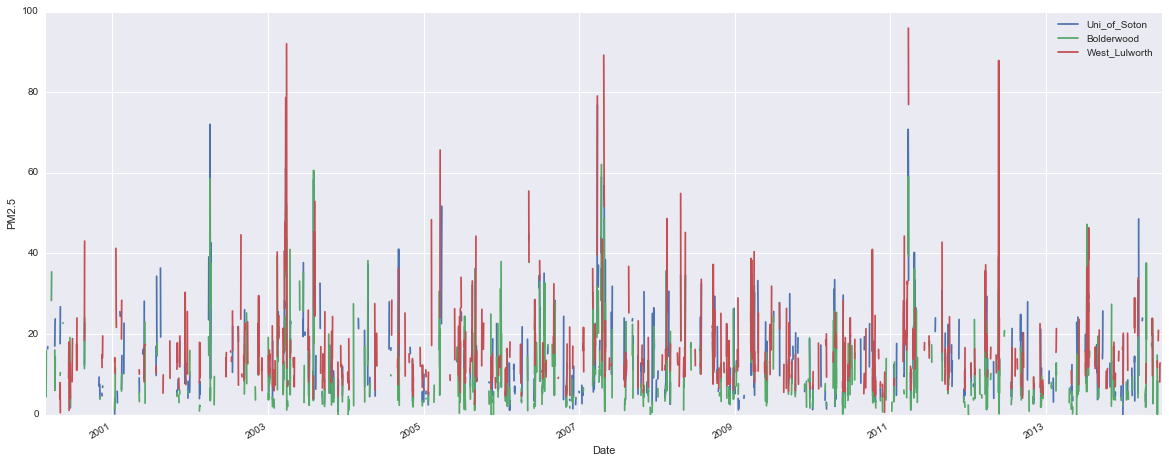

In [70]:
result_3.plot(figsize=(20,8))
plt.ylabel('PM2.5')
plt.xlabel('Date')
plt.savefig(r'D:\Annies_Dissertation\Analysis\Timeseries\Timeseries_2000_2014.jpeg')

In [64]:
result_3_sub = pd.read_csv(r'D:\Annies_Dissertation\Analysis\Timeseries\Timeseries_subset.csv')

In [65]:
result_3_sub[:5]

,time,Uni_of_Soton,Bolderwood,West_Lulworth
0,03/01/2009,5.227488,6.940765,20.770111
1,06/01/2009,3.649378,3.373983,7.196661
2,08/01/2009,10.553608,7.133564,15.486485
3,14/01/2009,18.641420,7.567362,10.931637
4,17/01/2009,4.043906,5.109175,16.579649


In [66]:
result_3_sub = result_3_sub.set_index('time')

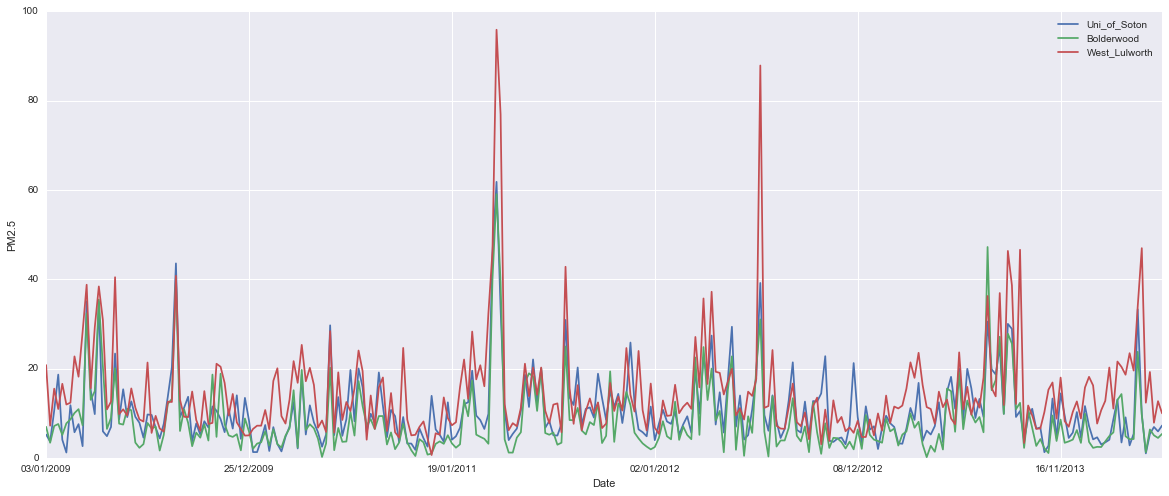

In [67]:
result_3_sub.plot(figsize=(20,8))
plt.ylabel('PM2.5')
plt.xlabel('Date')
plt.savefig(r'D:\Annies_Dissertation\Analysis\Timeseries\Timeseries_2009_2014.jpeg')

# Analysis
## overall average of every pixel

The next four cells were added by Robin for profiling - ignore them for the moment :P

In [ ]:
om = PM25.mean(dim='time', keep_attrs=True)

In [ ]:
from dask.diagnostics import Profiler, ResourceProfiler, CacheProfiler

In [ ]:
with Profiler() as prof, ResourceProfiler(dt=0.25) as rprof:
    om.load()

In [ ]:
from dask.diagnostics import visualize
visualize([prof, rprof], show=True)

In [ ]:
overall_mean = PM25.mean(dim='time', keep_attrs=True)

In [ ]:
overall_mean.attrs

In [ ]:
with ProgressBar():
    res = overall_mean.load()

In [ ]:
xarray_to_rasterio(overall_mean, r'D:\Annies_Dissertation\Analysis\overall_mean.tif')

## Averages
### Monthly

In [ ]:
monthly_mean = PM25.groupby('time.month').mean(dim='time', keep_attrs=True)

In [ ]:
monthly_mean.coords

In [ ]:
monthly_mean.attrs

In [ ]:
figure(figsize=(20, 12))
monthly_mean.plot(col='month', robust=True)

In [ ]:
xarray_to_rasterio_by_band(monthly_mean, r'D:\Annies_Dissertation\Analysis\monthly\monthly_mean_', dim='month')

### Seasonal

In [ ]:
seasonal_mean = PM25.groupby('time.season').mean(dim='time', keep_attrs=True)

In [ ]:
seasonal_mean.coords

In [ ]:
figure(figsize=(20, 12))
seasonal_mean.plot(col='season', robust=True)

In [ ]:
xarray_to_rasterio_by_band(seasonal_mean, r'D:\Annies_Dissertation\Analysis\seasonal\seasonal_mean_', dim='season')

### Yearly

In [ ]:
yearly_mean = PM25.groupby('time.year').mean(dim='time', keep_attrs=True)

In [ ]:
yearly_mean.coords

In [ ]:
figure(figsize=(20, 12))
yearly_mean.plot(col='year', robust=True)

In [ ]:
xarray_to_rasterio_by_band(yearly_mean, r'D:\Annies_Dissertation\Analysis\yearly\yearly_mean_', dim='year')

## Standard deviation of AP for each pixel over time- not currently what i want to do!

In [ ]:
std = PM25.groupby('time.year').std(dim = 'time', keep_attrs=True)

In [ ]:
std = PM25.std(dim = 'time', keep_attrs=True)

In [ ]:
std.coords

In [ ]:
figure(figsize=(20, 12))
std.plot(col='year', robust=True)

In [ ]:
xarray_to_rasterio(std, r'D:\Annies_Dissertation\Analysis\overall_std.tif')

# Count of values that aren't missing

In [ ]:
observations = PM25.count(dim='time', keep_attrs=True)

In [ ]:
xarray_to_rasterio(observations, r'D:\Annies_Dissertation\Analysis\observations_count.tif')

In [ ]:
count_histo = observations.plot.hist()
savefig(r'D:\Annies_Dissertation\Analysis\count_histogram.jpeg')

In [ ]:
figure(figsize=(20, 12))
observations.plot(robust=True)

## Buncefield fire

In [ ]:
PM25 = PM25.isel(time=np.argsort(PM25.time))

In [8]:
B_fire = PM25.sel(time='2005-12-15')

In [9]:
B_fire

<xarray.DataArray 'data' (time: 1, y: 1162, x: 1240)>
dask.array<getitem..., shape=(1, 1162, 1240), dtype=float32, chunksize=(1, 1162, 1240)>
Coordinates:
  * x        (x) float64 -9.476e+05 -9.464e+05 -9.451e+05 -9.439e+05 ...
  * y        (y) float64 1.429e+06 1.428e+06 1.427e+06 1.426e+06 1.424e+06 ...
  * time     (time) datetime64[ns] 2005-12-15
Attributes:
    affine: [ -9.47639631e+05   1.25654304e+03   0.00000000e+00   1.42927781e+06
   0.00000000e+00  -1.25654304e+03]
    crs: +init=epsg:27700

In [10]:
%time xarray_to_rasterio(B_fire, r'D:\Annies_Dissertation\Analysis\Specific_events\Buncefield\B_fire\15122005.tif')

Wall time: 140 ms


## Doesn't work

In [ ]:
B_fire = PM25.sel(time=slice('2005-12-10', '2005-12-12'))

In [ ]:
xarray_to_rasterio_by_band(B_fire, r'D:\Annies_Dissertation\Analysis\Specific_events\Buncefield\B_fire\B_fire_', dim='time')